<a href="https://colab.research.google.com/github/khushalrs/ML_Repo/blob/main/Youtube_Spam_Comment_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shrushti,Shreyas,Khushal   
Roll no: I-076,I-082,I-083          
Stream: CS (AI)      
Division: I                         
Semester: 4th Semester                                                       
         
##Project Topic: **Detecting Youtube Spam Comments**

#Introduction:
Our aim in this to devise a fastest and most accurate method for distinguishing the comments on YouTube as Spam and Ham i.e. comments those are spam and not-spam. This approach would aid in constructing an algorithm for blocking/removing inadmissible and undesirable comments from the view.           
    The generic algorithms designed to distinguish spam and ham in emails,SMS or on other social media sites(which are designed to classify content based on occuernce of selected spam keywords) will fail in identifying spam in YouTube, because in other social media sites and emails, generally spams are generated by Bots. On the other hand, spam in YouTube is usually created by actual users to self-promote and market their brands or propagating malicious links and websites to hack the accounts. So method proposed cannot be applied as spam content might look similar to the authentic comments, for example: Links of the most famous or most watched videos of an artist/music album will be shared in other related videos too and such comments cannot be tagged as Spam Comment.     
    **Example of Spam Comment**

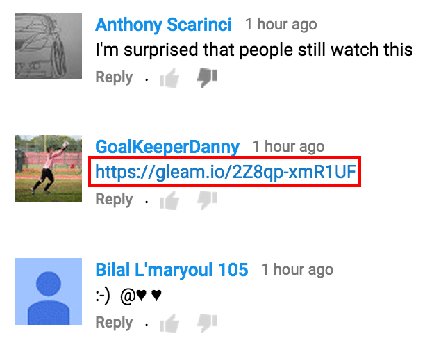    
    


    

In [ ]:
#import necessary libraries
import pandas as pd
#re library is used to check if a string contains the specified search pattern.
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## About Data
As an example for text classification we work with 1956 comments from 5 different YouTube videos. The comments were collected via the YouTube API from five of the ten most viewed videos on YouTube in the first half of 2015. The comments were manually labeled as spam or legitimate. Spam was coded with a “1” and legitimate comments with a “0”. Data files: 'Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv'.                              
In real life, a youtube creator can automatically fetch comments from his channel using youtube API and use the required algorithm to filter out comments.

In [ ]:
#Read in the data
train_data = []
#Importing comments of 5 youtube videos
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv(file)
    train_data.append(data)
train_data = pd.concat(train_data)
#Printing the first 5 rows
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
#check the count of unique values of each class
train_data['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

## Cleaning the data
1. Drop insignificant columns
2. Process the contents of data
3. Extract features from the data


In [ ]:
#drop columns function is defined
def drop_features(features,data):
    data.drop(features,axis=1,inplace=True)

In [ ]:
#3 columns are dropped.
drop_features(['COMMENT_ID','AUTHOR','DATE'],train_data)
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
#process content function is defined to remove the punctuations and lower the case of all the letters for uniformity
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [ ]:
train_data['processed_content'] = train_data['CONTENT'].apply(process_content)
train_data.head()

,CONTENT,CLASS,processed_content
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtarggvgtwq check this out


In [ ]:
#drop 'CONTENT', lets use 'PROCESSED CONTENT'
drop_features(['CONTENT'],train_data)

In [ ]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(train_data['processed_content'],train_data['CLASS'],test_size=0.2,random_state=57)

In [ ]:
print(x_train)

276    cool video lmfaovevo you should check out my s...
261                                  subscribe my chanel
244    i know that maybe no one will read this but pl...
318                   check out this playlist on youtube
380    hey its m e s here i m a young up and coming r...
                             ...                        
403    subscribe to me if u think quot swag quot is f...
56     i love this song it s for empowering every wom...
329          check out this playlist on youtube hbbhhhgh
164    could spanish people understand this br br any...
275     like this comment if you are watching on a phone
Name: processed_content, Length: 1564, dtype: object




```
!
```



In [ ]:
#Feature extraction
# We use countvectorizer to convert text into matrix of word counts which is called Document Term Matrix(DTM) where Terms are represented as columns and Documents/strings as rows.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_vect = count_vect.fit_transform(x_train)  #returns (string_index, feature_index) count

# fit_transform function where it learned the vocabulary and transformed it into a sparse matrix. 
#If we just see the result of x_train_vect, we find that it has eliminated all zeros from the matrix to improve memory utilization.

Count Vectorizer in laymen terms mean counting the words and putting that into bag irrespective of their order or structure. like for example if we have a set of strings.             
data_set = ("Pizza is very tasty",            
            "Pizza is famous all over the world",         
            "Roganjosh is a cusine of Kashmir",          
            "Pizza is famous in India as well, people love pizza")


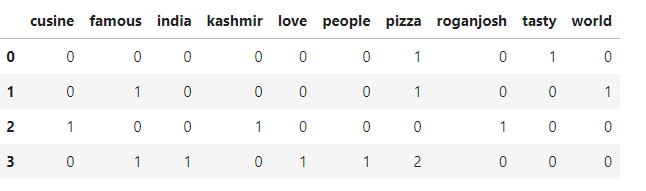

In [ ]:
print(count_vect.vocabulary_) #gives the frequency of a word when considering ALL of the dataset.
print(x_train_vect)

{'cool': 579, 'video': 3107, 'lmfaovevo': 1726, 'check': 463, 'shuffling': 2618, 'videos': 3108, 'channel': 451, 'chance': 446, 'appreciated': 155, 'cheers': 467, 'rel': 2416, 'nofollow': 2026, 'class': 498, 'ot': 2105, 'hashtag': 1285, 'href': 1372, 'https': 1376, 'plus': 2229, 'google': 1202, 'com': 525, 'everydayimvaping': 918, 'subscribe': 2802, 'chanel': 447, 'know': 1614, 'maybe': 1827, 'read': 2379, 'type': 3028, 'quot': 2352, 'deazy': 685, 'rapper': 2367, 'dream': 791, 'like': 1689, 'millions': 1883, 'everyday': 917, 'music': 1963, 'thank': 2907, 'love': 1756, 'decent': 687, 'following': 1061, 'youtube': 3320, 'people': 2168, 'reading': 2380, 'thumbs': 2933, 'just': 1563, 'simple': 2631, 'button': 392, 'press': 2275, 'make': 1797, 'come': 526, 'true': 2999, 'time': 2941, 'amp': 112, 'god': 1190, 'bless': 312, 'playlist': 2218, 'hey': 1321, 'young': 3316, 'coming': 533, 'wanna': 3164, 'heard': 1304, 'spam': 2718, 'wont': 3240, 'fame': 971, 'moment': 1921, 'got': 1209, 'way': 318

In [ ]:
#Term frequency - inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer #importing the required library
tfimodel = TfidfTransformer()   #using the tfid model and then parsing the training data.
x_train_new = tfimodel.fit_transform(x_train_vect)

TF-IDF stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same bag.

TF-IDF is a score which is applied to every word in every document in our dataset. And for every word, the TF-IDF value increases with every appearance of the word in a document, but is gradually decreased with every appearance in other documents.

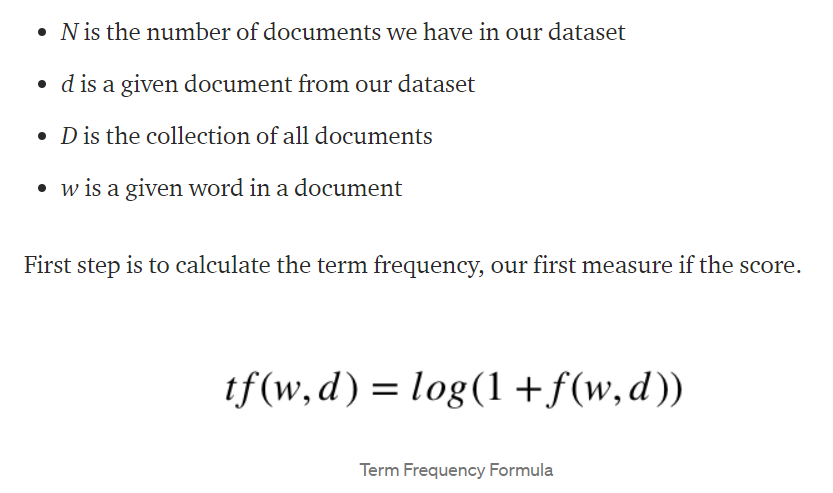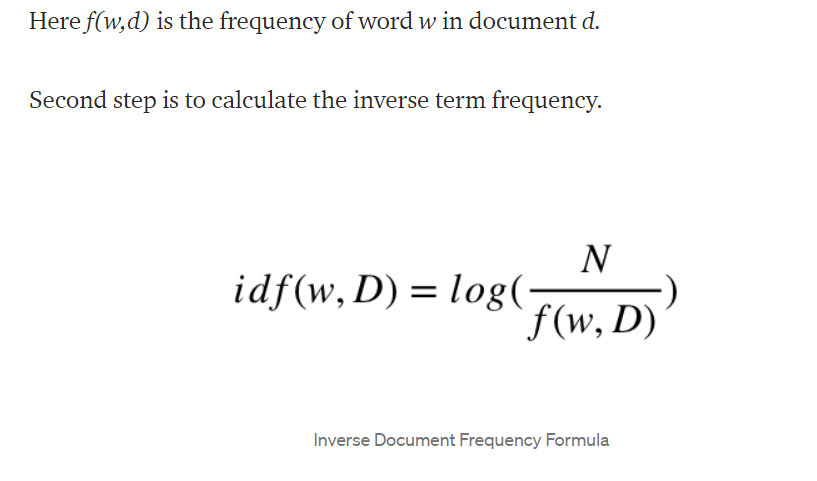


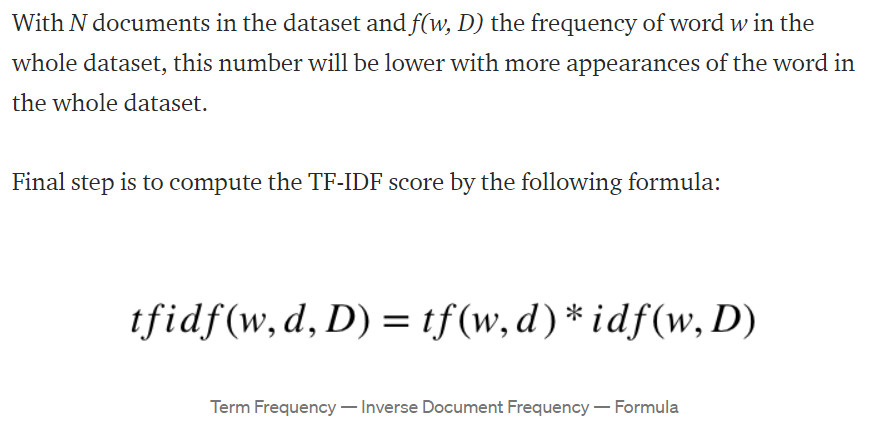


In [ ]:
print(x_train_new)

  (0, 3108)	0.15012737481999194
  (0, 3107)	0.09954971942502733
  (0, 2618)	0.2266210988147399
  (0, 2416)	0.221298974133836
  (0, 2229)	0.1949857305863566
  (0, 2105)	0.221298974133836
  (0, 2026)	0.221298974133836
  (0, 1726)	0.264551204493268
  (0, 1376)	0.14331344758515127
  (0, 1372)	0.17222496536498563
  (0, 1285)	0.221298974133836
  (0, 1202)	0.18176274304837522
  (0, 918)	0.529102408986536
  (0, 579)	0.18176274304837522
  (0, 525)	0.11157517176922857
  (0, 498)	0.20898460403619162
  (0, 467)	0.250552331043433
  (0, 463)	0.08366888312187151
  (0, 451)	0.11642107551984254
  (0, 446)	0.17222496536498563
  (0, 155)	0.21668874003588184
  (1, 2802)	0.4169027916259167
  (1, 447)	0.9089510780754471
  (2, 3320)	0.08121655125127974
  (2, 3028)	0.14476805678751523
  :	:
  (1559, 1108)	0.36503154042412095
  (1560, 3234)	0.4574005489887746
  (1560, 2695)	0.20333946164509845
  (1560, 2480)	0.3705517204574569
  (1560, 1756)	0.22724886827505128
  (1560, 1303)	0.3569460101522803
  (1560, 1197)	

In [ ]:
x_test_counts = count_vect.transform(x_test)    #doing the same above 2 mentioned methods for the testing data.
x_test_tfidf = tfimodel.transform(x_test_counts) #hereafter we will be passing this as our x_test trsting data for ML models.



```
!
```



## ML Modeling
We have completed cleaning of our data and we have training samples to train the model and testing samples to verify the accuracy of our models. 

## Logistic Regression
Logistic regression is a simple statistical model which predicts a binary response (ex. 0/1). For this data, we are predicting whether a comment is a spam or not.

In [ ]:
#Create and train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(x_train_new,y_train)

LogisticRegression()

In [ ]:
#Run it on test data and calculate the accuracy
accuracy = model_reg.score(x_test_tfidf, y_test)
print(accuracy)

0.9260204081632653


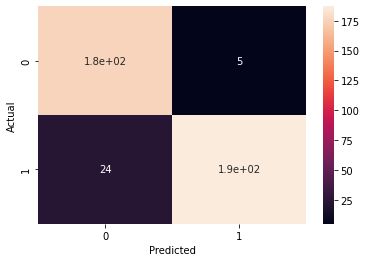

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_reg = model_reg.predict(x_test_tfidf)
#comparing the predicted and given values
con_mat = pd.crosstab(y_test,y_pred_reg,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_reg)

array([[176,   5],
       [ 24, 187]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
#precision score = TP/(TP+FP)
precision_score(y_test,y_pred_reg)

0.9739583333333334

In [ ]:
#recall score = TP/(TP+FN)
recall_score(y_test,y_pred_reg)

0.8862559241706162

In [ ]:
#f1 score = (2*recall*precision)/(recall+precision)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_reg)

0.9280397022332506



```
!
```



## Random Forest Classifier
Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The forest it builds, is an ensemble of Decision Trees. To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [ ]:
#Create and train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier() #Defining an object of the random forest classifier class
model_rfc.fit(x_train_new,y_train) #Training the model using the train dataset

RandomForestClassifier()

In [ ]:
accuracy = model_rfc.score(x_test_tfidf, y_test) #Checking the accuracy of the fitted model using the test data
print(accuracy)

0.9362244897959183


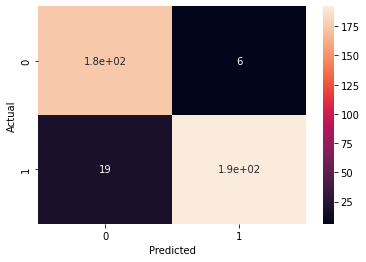

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_rfc = model_rfc.predict(x_test_tfidf) #Predicting the category of the comment using the test data
con_mat = pd.crosstab(y_test,y_pred_rfc,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True) #Generating a confusion matrix using a heatmap

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rfc) #Actual values of the confusion matrix

array([[175,   6],
       [ 19, 192]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred_rfc) #Calculating the precision score of the predicted values

0.9696969696969697

In [ ]:
recall_score(y_test,y_pred_rfc) #Calculating the recall score of the predicted values

0.909952606635071

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_rfc) #Calculating the f1 score of the predicted values

0.9388753056234718

## Support Vector Machine
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [ ]:
#Create and train Support Vector Machine model
from sklearn import svm
model_svm = svm.SVC(C=100, gamma = 1) #Define an object of class SVC having error parameter of 100 and gamma function value as 1. gamma is a kernel coefficient.
model_svm.fit(x_train_new, y_train) #Train the model using the train dataset

SVC(C=100, gamma=1)

In [ ]:
#Run it on test data and calculate the accuracy
accuracy = model_svm.score(x_test_tfidf, y_test) #Checking accuracy of the fitted model using the test data
print(accuracy)

0.9336734693877551


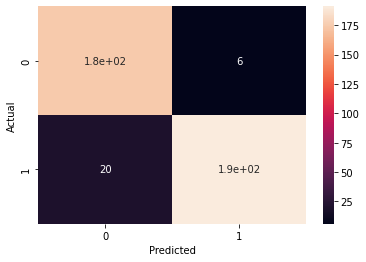

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_svm = model_svm.predict(x_test_tfidf) #Predicting the category of comment using the trained model
con_mat = pd.crosstab(y_test,y_pred_svm,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True) #Plotting a heatmap using the predicted values

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm) #Actual values of the confusion matrix

array([[175,   6],
       [ 20, 191]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred_svm) #Calculating the precision score of the predicted values

0.9695431472081218

In [ ]:
recall_score(y_test,y_pred_svm) #Calculating the recall score of the predicted values

0.9052132701421801

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_svm) #Calculating the f1 score of the predicted values

0.9362745098039216

## Support Vector Machine

 Another model of SVM is built using different parameters value

In [ ]:
from sklearn import svm
model_svm_new = svm.SVC(C=100, gamma = 0.5) #Changing the parameter of the gamma function to try to get better accuracy
model_svm_new.fit(x_train_new, y_train) #Training the new model
accuracy = model_svm_new.score(x_test_tfidf, y_test)
print(accuracy) #Checking the accuracy of the new model on test data

0.9413265306122449


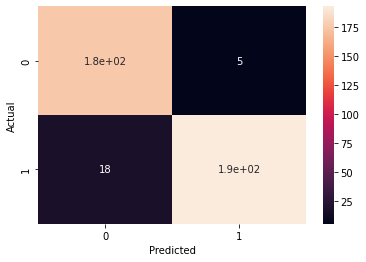

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_svm_new = model_svm_new.predict(x_test_tfidf) #Predict the category of the comment in the test dataset
con_mat = pd.crosstab(y_test,y_pred_svm_new,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(con_mat,annot=True) #Plotting the heatmap of the predicted values

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm_new) #Actual values of the confusion matrix

array([[176,   5],
       [ 18, 193]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred_svm_new) #Calculating the precision score of the predicted values

0.9747474747474747

In [ ]:
recall_score(y_test,y_pred_svm_new) #Calculating the recall score of the predicted values

0.9146919431279621

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_svm_new) #Calculating the f1 score of the predicted values

0.943765281173594

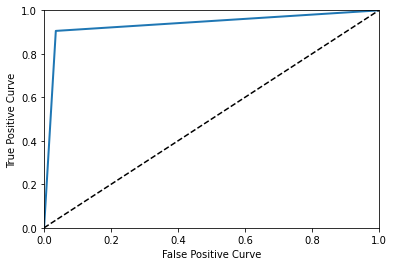

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(model_svm_new,x_train_new, y_train,cv=3,method='predict')


from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_train,y_scores)

def plot_roc(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Curve')
  plt.ylabel('True Positive Curve')
                         
plot_roc(fpr,tpr)       

#Observations
1) The slightly tweaked version of SVM gives the best accuracy of 94.13%.   
2) Random forest gives a good accuracy score of 93.87% which is close to that of SVM.        
3) When applying to large dataset with millions of input data then at that time we have to check which model will give better performace as SVM has more time complexity where as Random forest has more space complexity. 

#Conclusion
1) Spamming is one of
the contemporary issues that has entangled the world. Even
though, YouTube has spam reporting mechanism, ascertaining
comments as spam and control of it has not been fully
successful. The proposed algorithms which we presented would make the nascent steps into detecting Spams that should be eliminated and this should
form the footing ground for further detection of Online
Inclivity and removal of them.           
2) In a real world scenario if Random forest and  SVM  gave same accuracy then using SVM would be more practical as it has less space complexity i.e O(n) whereas random forest has a space complexity of  O(no of nodes * K) [where K' is the number of base learning models]

##Acknowledgements:
1) Research Paper:
https://www.researchgate.net/publication/327249513_Youtube_spam_comment_detection_using_support_vector_machine_and_K-nearest_neighbor

2) UCI - Youtube comments Dataset:
https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

In [ ]:
! jupyter nbconvert --to html Final_ML_Project_Youtube_spam.ipynb

[NbConvertApp] Converting notebook Final_ML_Project_Youtube_spam.ipynb to html
[NbConvertApp] Writing 727011 bytes to Final_ML_Project_Youtube_spam.html
